In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:/Toxic Comments/Cleaning the data/cleaned.csv" , encoding="latin-1")

In [3]:
df.head(20)

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,1,000103f0d9cfb60f,d'aww! matches background colour i'm seemingly...,0,0,0,0,0,0
2,2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0
3,3,0001b41b1c6bb37e,""" can't make real suggestions improvement - wo...",0,0,0,0,0,0
4,4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0
5,5,00025465d4725e87,""" congratulations well, use tools well. Ã¢ Ã¢Â...",0,0,0,0,0,0
6,6,0002bcb3da6cb337,cocksucker piss around work,1,1,1,0,1,0
7,7,00031b1e95af7921,vandalism matt shirvington article reverted. p...,0,0,0,0,0,0
8,8,00037261f536c51d,"sorry word 'nonsense' offensive you. anyway, i...",0,0,0,0,0,0
9,9,00040093b2687caa,alignment subject contrary dulithgow,0,0,0,0,0,0


In [4]:
x_train , x_split , y_train , y_split = train_test_split(df["comment_text"] , 
                                df[["toxic" , "severe_toxic" , "obscene" , "threat" , "insult" , "identity_hate"]] , 
                                test_size= 0.3 , random_state=42)

In [5]:
x_test , x_val , y_test , y_val  = train_test_split( x_split, y_split, test_size= 0.5, random_state=42)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(111699,)
(23936,)
(23936,)
(111699, 6)
(23936, 6)
(23936, 6)


In [7]:
round(sum([len(i.split()) for i in x_train])/len(x_train))

37

In [8]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [9]:
text_vec = TextVectorization(max_tokens= None , output_mode= 'int' , output_sequence_length= 55 , standardize= "lower_and_strip_punctuation" , split="whitespace")
text_vec

In [10]:
text_vec.adapt(x_train)

In [11]:
embed = keras.layers.Embedding (input_dim=30000, 
                                output_dim=128, 
                                embeddings_initializer="uniform", 
                                input_length=55,
                                name="embedding_1")

In [12]:
embed

In [13]:
from tensorflow.keras import layers

In [14]:
input = layers.Input(shape=(1,), dtype="string")

tv = text_vec (input)

em = embed(tv)

LSTM = layers.LSTM(64 , kernel_initializer= keras.initializers.RandomNormal(stddev=0.0001) ,
                         recurrent_initializer = keras.initializers.Identity(gain=1.0))(em)

drop1 = layers.Dropout(0.2)(LSTM)  

dense1 = layers.Dense(32 , activation="relu")(drop1)

drop2 = layers.Dropout(0.2)(dense1)

dense2 = layers.Dense(32 , activation="relu")(drop2)

output1 = layers.Dense(1 , activation="sigmoid" , name = "toxic")(dense2)
output2 = layers.Dense(1 , activation="sigmoid" , name = "severe_toxic")(dense2)
output3 = layers.Dense(1 , activation="sigmoid" , name = "obscene")(dense2)
output4 = layers.Dense(1 , activation="sigmoid" , name = "threat")(dense2)
output5 = layers.Dense(1 , activation="sigmoid" , name = "insult")(dense2)
output6 = layers.Dense(1 , activation="sigmoid" , name = "identity_hate")(dense2)

model_LSTM = keras.Model(inputs= input , outputs = [output1,output2,output3,output4,output5,output6] , name = 'vannila_rnn')


In [15]:
model_LSTM.summary()

Model: "vannila_rnn"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 55)          0           ['input_1[0][0]']                
 ization)                                                                                         
                                                                                                  
 embedding_1 (Embedding)        (None, 55, 128)      3840000     ['text_vectorization[0][0]']     
                                                                                                  
 lstm (LSTM)                    (None, 64)           49408       ['embedding_1[0][0]']  

In [16]:
from tensorflow.keras.utils import plot_model

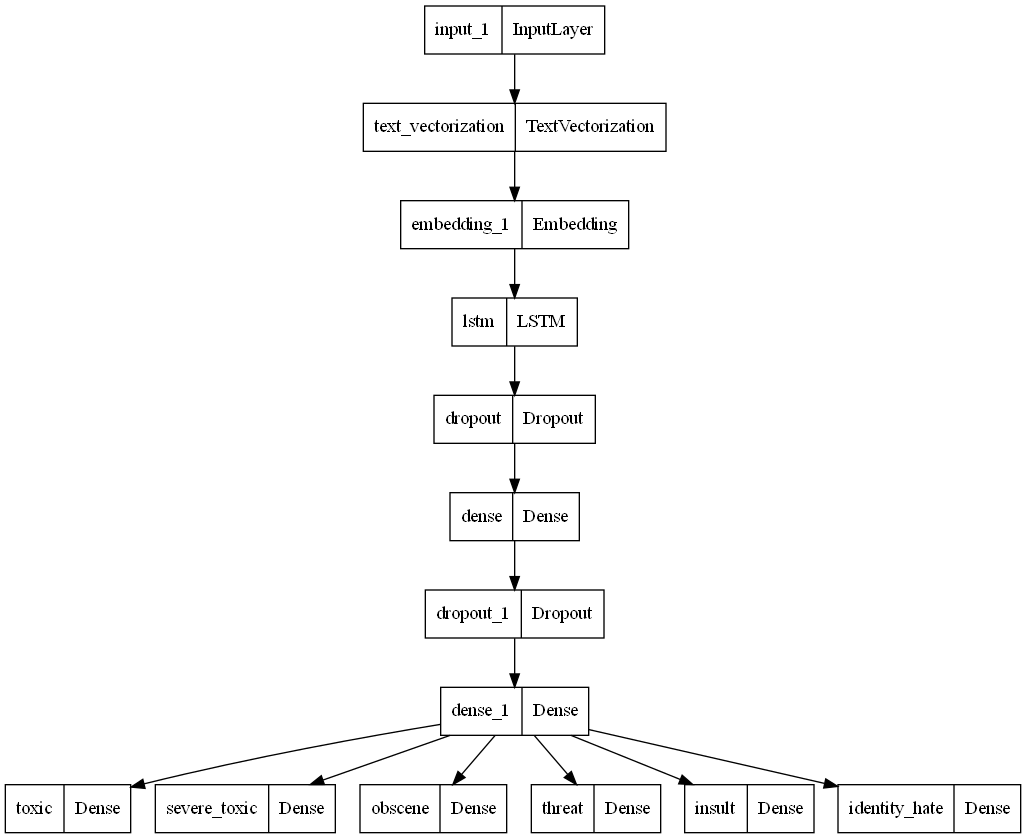

In [17]:
plot_model(model_LSTM)

In [18]:
model_LSTM.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=1e-5 ) ,   
                     loss = ['binary_crossentropy' , 'binary_crossentropy' , 'binary_crossentropy' , 
                     'binary_crossentropy' , 'binary_crossentropy' , 'binary_crossentropy'] , metrics= ["accuracy"])

In [19]:
model_LSTM.fit(x = x_train , y = [y_train.toxic , y_train.severe_toxic , y_train.obscene 
                                    , y_train.threat , y_train.insult , y_train.identity_hate] ,
                batch_size=512, epochs=30,
                 validation_data=(x_val , [ y_val.toxic , y_val.severe_toxic , y_val.obscene 
                                            , y_val.threat , y_val.insult , y_val.identity_hate]))

Epoch 1/30
219/219 [==============================] - 12s 36ms/step - loss: 4.1233 - toxic_loss: 0.6955 - severe_toxic_loss: 0.6754 - obscene_loss: 0.6866 - threat_loss: 0.6883 - insult_loss: 0.6932 - identity_hate_loss: 0.6843 - toxic_accuracy: 0.1151 - severe_toxic_accuracy: 0.9901 - obscene_accuracy: 0.9464 - threat_accuracy: 0.9895 - insult_accuracy: 0.5180 - identity_hate_accuracy: 0.9911 - val_loss: 4.0793 - val_toxic_loss: 0.6981 - val_severe_toxic_loss: 0.6543 - val_obscene_loss: 0.6784 - val_threat_loss: 0.6818 - val_insult_loss: 0.6929 - val_identity_hate_loss: 0.6738 - val_toxic_accuracy: 0.0969 - val_severe_toxic_accuracy: 0.9897 - val_obscene_accuracy: 0.9460 - val_threat_accuracy: 0.9972 - val_insult_accuracy: 0.2470 - val_identity_hate_accuracy: 0.9906
Epoch 2/30
219/219 [==============================] - 7s 31ms/step - loss: 4.0243 - toxic_loss: 0.7018 - severe_toxic_loss: 0.6269 - obscene_loss: 0.6686 - threat_loss: 0.6741 - insult_loss: 0.6932 - identity_hate_loss: 0.

In [20]:
 import matplotlib.pyplot as plt

In [23]:
def plot_hist(hist):
    plt.plot(hist.history.history["loss"])
    plt.plot(hist.history.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

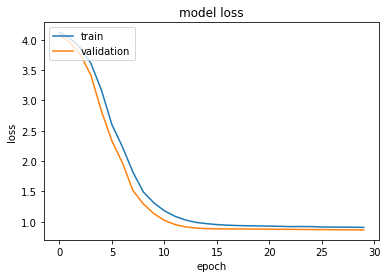

In [24]:
plot_hist(model_LSTM)

In [25]:
model_LSTM.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-5 ) ,   
                     loss = ['binary_crossentropy' , 'binary_crossentropy' , 'binary_crossentropy' , 
                     'binary_crossentropy' , 'binary_crossentropy' , 'binary_crossentropy'] , metrics= ["accuracy"])

In [26]:
model_LSTM.fit(x = x_train , y = [y_train.toxic , y_train.severe_toxic , y_train.obscene 
                                    , y_train.threat , y_train.insult , y_train.identity_hate] ,
                batch_size=512, epochs=30,
                 validation_data=(x_val , [ y_val.toxic , y_val.severe_toxic , y_val.obscene 
                                            , y_val.threat , y_val.insult , y_val.identity_hate]))

Epoch 1/30
219/219 [==============================] - 11s 39ms/step - loss: 0.8987 - toxic_loss: 0.3288 - severe_toxic_loss: 0.0631 - obscene_loss: 0.2201 - threat_loss: 0.0254 - insult_loss: 0.2058 - identity_hate_loss: 0.0556 - toxic_accuracy: 0.9040 - severe_toxic_accuracy: 0.9901 - obscene_accuracy: 0.9472 - threat_accuracy: 0.9969 - insult_accuracy: 0.9509 - identity_hate_accuracy: 0.9913 - val_loss: 0.8606 - val_toxic_loss: 0.3177 - val_severe_toxic_loss: 0.0590 - val_obscene_loss: 0.2093 - val_threat_loss: 0.0200 - val_insult_loss: 0.2019 - val_identity_hate_loss: 0.0527 - val_toxic_accuracy: 0.9031 - val_severe_toxic_accuracy: 0.9897 - val_obscene_accuracy: 0.9460 - val_threat_accuracy: 0.9972 - val_insult_accuracy: 0.9491 - val_identity_hate_accuracy: 0.9906
Epoch 2/30
219/219 [==============================] - 8s 36ms/step - loss: 0.8970 - toxic_loss: 0.3284 - severe_toxic_loss: 0.0620 - obscene_loss: 0.2190 - threat_loss: 0.0256 - insult_loss: 0.2057 - identity_hate_loss: 0.

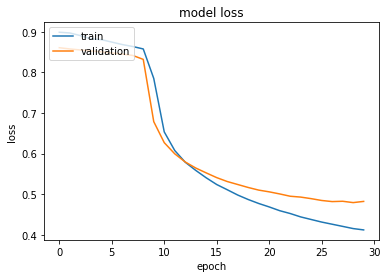

In [27]:
plot_hist(model_LSTM)

In [30]:
model_LSTM.save("lstm.hfd5")

INFO:tensorflow:Assets written to: lstm.hfd5\assets


INFO:tensorflow:Assets written to: lstm.hfd5\assets


In [31]:
model_LSTM.save("lstm.tf")

INFO:tensorflow:Assets written to: lstm.tf\assets


INFO:tensorflow:Assets written to: lstm.tf\assets


In [8]:
model = tf.keras.models.load_model("lstm.tf")

In [13]:
model.evaluate(x_test, [ y_test.toxic , y_test.severe_toxic , y_test.obscene 
                                            , y_test.threat , y_test.insult , y_test.identity_hate])

748/748 [==============================] - 11s 13ms/step - loss: 0.4696 - toxic_loss: 0.1814 - severe_toxic_loss: 0.0289 - obscene_loss: 0.0988 - threat_loss: 0.0220 - insult_loss: 0.0970 - identity_hate_loss: 0.0415 - toxic_accuracy: 0.9076 - severe_toxic_accuracy: 0.9900 - obscene_accuracy: 0.9472 - threat_accuracy: 0.9971 - insult_accuracy: 0.9511 - identity_hate_accuracy: 0.9914


[0.4695621132850647,
 0.18135906755924225,
 0.02892913483083248,
 0.09881506115198135,
 0.021969005465507507,
 0.09696777164936066,
 0.04152197390794754,
 0.9075868725776672,
 0.989973247051239,
 0.9472342729568481,
 0.9971173405647278,
 0.9511196613311768,
 0.9913519620895386]